In [1]:
import cv2
import numpy as np 
from glob import glob
import os
import matplotlib.pyplot as plt

In [2]:
def get_images_from_path (folder_path):
    images_path = os.listdir(folder_path)
    pictures = []
    for image in images_path:
        picture = cv2.imread(os.path.join(folder_path, image)) 
        pictures.append(picture)
    return pictures 

In [3]:
def segmentation(img , mask):
    
    h, w = img.shape[:2]
    for row in range(h):
        if mask[row, 0] == 255:
            cv2.floodFill(mask, None, (0, row), 0)
        if mask[row, w-1] == 255:
            cv2.floodFill(mask, None, (w-1, row), 0)
    for col in range(w):
        if mask[0, col] == 255:
            cv2.floodFill(mask, None, (col, 0), 0)
        if mask[h-1, col] == 255:
            cv2.floodFill(mask, None, (col, h-1), 0)

    # flood fill background to find inner holes
    holes = mask.copy()
    cv2.floodFill(holes, None, (0, 0), 255)

    # invert holes mask, bitwise or with mask to fill in holes
    holes = cv2.bitwise_not(holes)
    mask = cv2.bitwise_or(mask, holes)

    # display masked image
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    masked_img_with_alpha = cv2.merge([img, img, img, mask])
    #cv2.imwrite('F:/lvl 4/GP DataSet/Segmented/' + str(counter) + 'Segmented.png', masked_img)
    #cv2.imwrite('F:/lvl 4/GP DataSet/Segmented/' + str(counter) + 'Segmented.png', masked_img_with_alpha)
    #counter += 1
    return masked_img

In [4]:
#BASE_IMG_PATH = 'F:/lvl 4/GP DataSet/Categories/A'
#all_images = glob(os.path.join(BASE_IMG_PATH , '*.jpg'))

In [5]:
all_images = get_images_from_path('F:/lvl 4/GP DataSet/Categories/A')
counter = 0
for img in all_images:
    ret, mask = cv2.threshold(img , 150 , 255 , cv2.THRESH_TOZERO) 
    cv2.imwrite('F:/lvl 4/GP DataSet/Masks/' + str(counter) + 'masked.png', mask)
    counter += 1

In [6]:
all_masks  = get_images_from_path('F:/lvl 4/GP DataSet/Masks/')
segmented_images = []
counter = 0
for img in all_images:
    mask = cv2.imread('F:/lvl 4/GP DataSet/Masks/' + str(counter) + 'masked.png', 0)
    segmented_images.append(segmentation(img , mask))
    counter += 1
    
    

In [7]:
#BASE_IMG_PATH = 'F:/lvl 4/GP DataSet/Categories/A'
#all_images = glob(os.path.join(BASE_IMG_PATH , '*.jpg'))

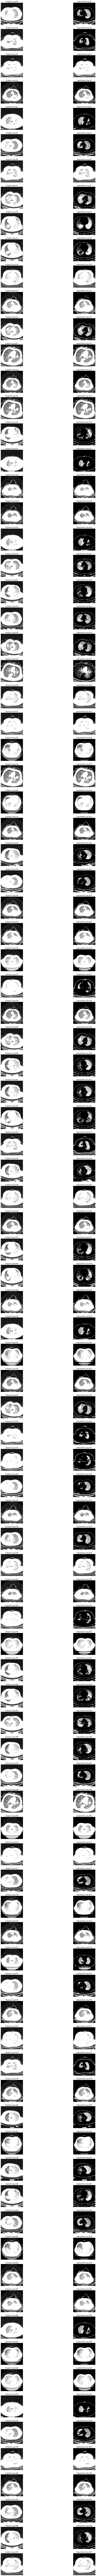

In [17]:
n = len(all_images) #Number of images
f, axes  = plt.subplots(n , 2 , sharey = True , figsize = (20, 400))

for i in range(n):
    axes[i , 0].imshow(all_images[i], cmap='gray')
    axes[i , 0].set_title("Original Lung #{}" .format(i))
    axes[i , 0].axis('off')

    axes[i , 1].imshow(segmented_images[i], cmap='gray')
    axes[i , 1].set_title("Segmented Lung #{}" .format(i))
    axes[i , 1].axis('off')

plt.show()